In [92]:
import os
import joblib
import pickle


import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import plotly_express as px
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, f1_score, confusion_matrix, precision_recall_curve, roc_curve
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report,accuracy_score
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier, GradientBoostingClassifier

from xgboost import XGBClassifier
from lightgbm import LGBMClassifier


In [2]:
split_rate = 0.2
seed = 42
n_cores = int(os.cpu_count()/2)
print(n_cores)

8


In [3]:
df = pd.read_csv('pd_speech_features.csv', header=1)

# EDA

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(749), int64(6)
memory usage: 4.4 MB


In [5]:
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.008064,0.000087,0.00218,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258,0.000073,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.008340,0.000060,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010858,0.000183,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1
4,1,0,0.32790,0.79782,0.53028,236,235,0.008162,0.002669,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [6]:
df.describe()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
count,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,...,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000,756.000000
mean,125.500000,0.515873,0.746284,0.700414,0.489058,323.972222,322.678571,0.006360,0.000383,0.002324,...,26.237251,22.840337,18.587888,13.872018,12.218953,12.375335,14.799230,14.751559,31.481110,0.746032
std,72.793721,0.500079,0.169294,0.069718,0.137442,99.219059,99.402499,0.001826,0.000728,0.002628,...,42.220693,32.626464,25.537464,20.046029,17.783642,16.341665,15.722502,14.432979,34.230991,0.435568
min,0.000000,0.000000,0.041551,0.543500,0.154300,2.000000,1.000000,0.002107,0.000011,0.000210,...,1.509800,1.531700,1.582900,1.747200,1.789500,1.628700,1.861700,1.955900,2.364000,0.000000
25%,62.750000,0.000000,0.762833,0.647053,0.386537,251.000000,250.000000,0.005003,0.000049,0.000970,...,2.408675,3.452800,3.354825,3.077450,2.937025,3.114375,3.665925,3.741275,3.948750,0.000000
50%,125.500000,1.000000,0.809655,0.700525,0.484355,317.000000,316.000000,0.006048,0.000077,0.001495,...,5.586300,7.062750,6.077400,4.770850,4.300450,4.741450,6.725700,7.334250,10.637250,1.000000
75%,188.250000,1.000000,0.834315,0.754985,0.586515,384.250000,383.250000,0.007528,0.000171,0.002520,...,28.958075,29.830850,21.944050,13.188000,10.876150,12.201325,21.922050,22.495175,61.125325,1.000000
max,251.000000,1.000000,0.907660,0.852640,0.871230,907.000000,905.000000,0.012966,0.003483,0.027750,...,239.788800,203.311300,121.542900,102.207000,85.571700,73.532200,62.007300,57.544300,156.423700,1.000000


In [7]:
print(f'Number of duplicated columns : {df.columns.duplicated().sum()}')

df = df.loc[:,~df.columns.duplicated()] # drop duplicated columns if present

Number of duplicated columns : 0


In [8]:
df.apply(lambda x: sum(x.isnull()),axis=0) # Checking for missing values

id                           0
gender                       0
PPE                          0
DFA                          0
RPDE                         0
                            ..
tqwt_kurtosisValue_dec_33    0
tqwt_kurtosisValue_dec_34    0
tqwt_kurtosisValue_dec_35    0
tqwt_kurtosisValue_dec_36    0
class                        0
Length: 755, dtype: int64

In [9]:
df=df.sample(frac=1).reset_index(drop=True)# Resample data
df.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,153,1,0.78092,0.71624,0.61499,224,223,0.008613,0.000100,0.00155,...,1.7868,2.1009,25.5750,7.1918,5.5161,4.7853,3.3367,3.1437,3.4554,0
1,139,1,0.64188,0.78507,0.69633,142,140,0.009392,0.003198,0.00410,...,23.3561,8.5777,3.1276,2.7175,2.8110,3.3559,2.7336,2.8710,3.2689,1
2,9,1,0.84043,0.60437,0.39889,331,330,0.005838,0.000056,0.00140,...,3.0662,2.6687,3.2243,3.3488,3.1832,4.7456,8.4625,5.6324,38.9834,1
3,158,0,0.29004,0.67753,0.45232,308,307,0.006257,0.001798,0.00335,...,43.5915,48.8658,21.7880,3.3618,2.9878,3.2261,3.1573,6.2680,3.2808,1
4,150,1,0.83152,0.65268,0.63224,250,249,0.007720,0.000125,0.00265,...,4.4068,4.1526,3.6843,3.8842,3.5091,3.2166,2.4907,2.6857,2.7963,1


In [10]:
fig = px.histogram(df, x = 'class', color = 'gender', barmode = 'group', title = 'Class repartition betwenn genders')
fig.show()
print(f'Unbalanced data')

Unbalanced data


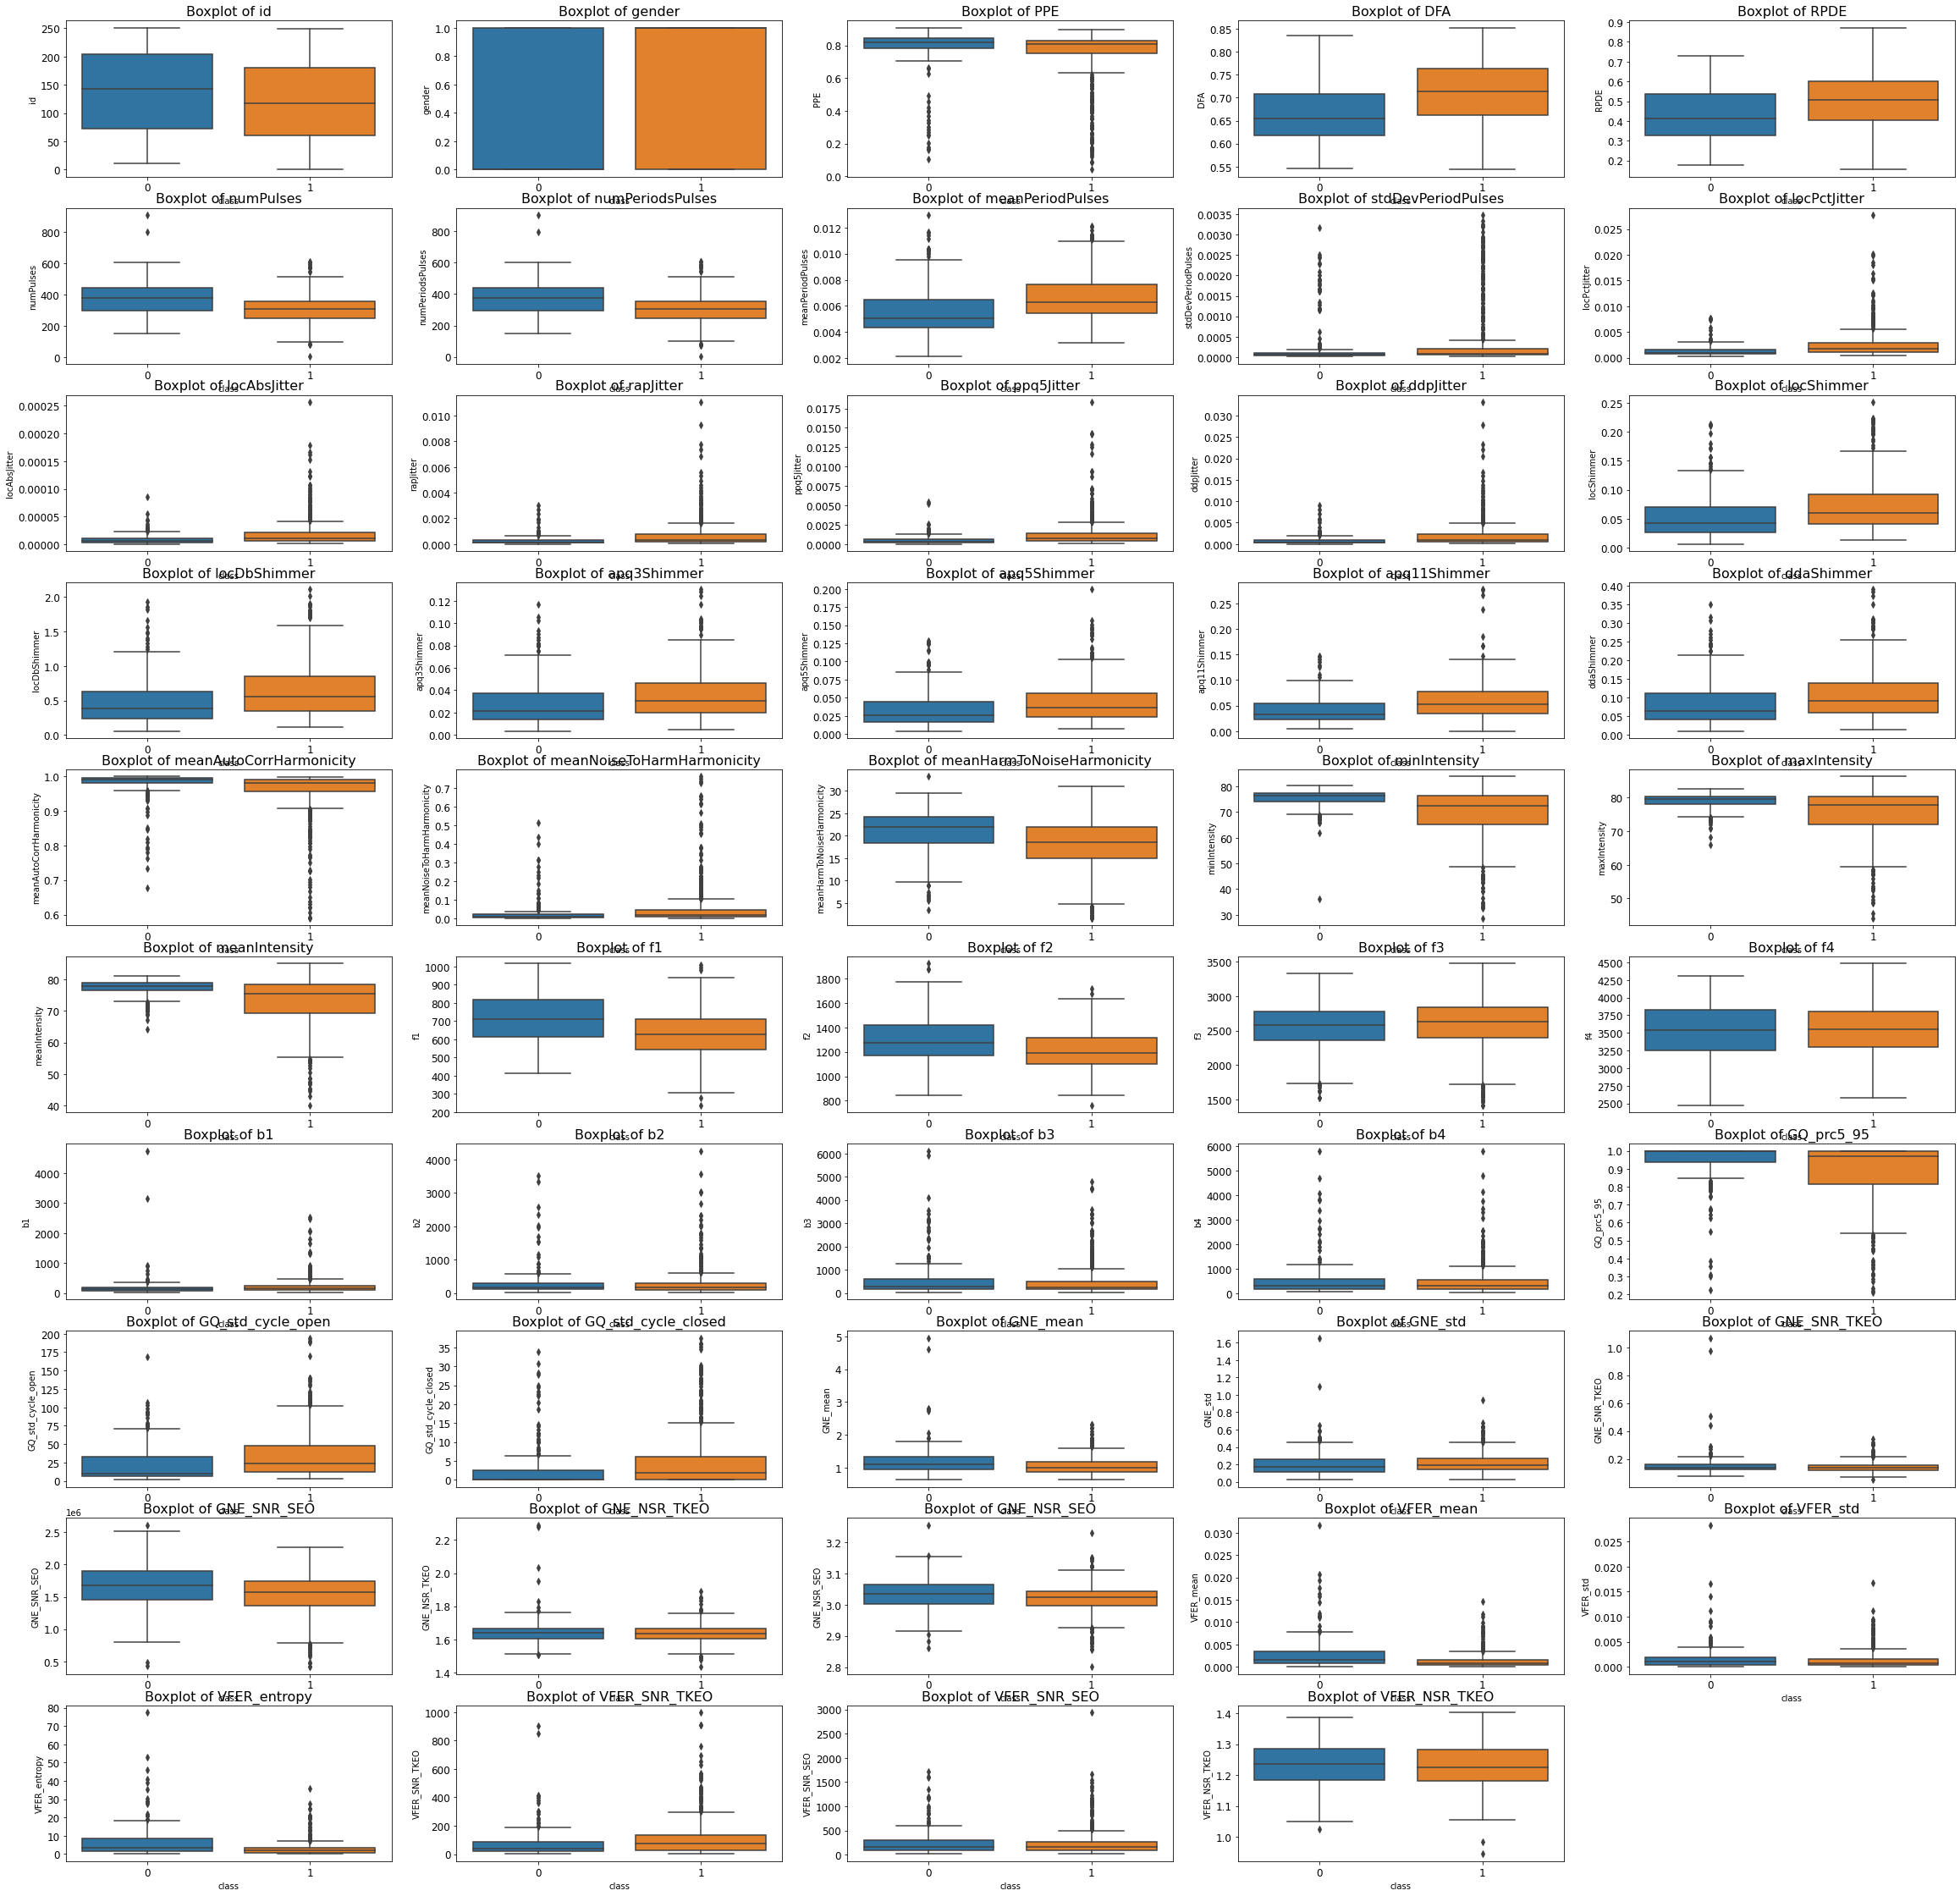

In [11]:
#Box Plotting All features distribution corresponding Target column
plt.figure(figsize=(40,40))
for idx, c in enumerate(df.columns[:49]):
    plt.subplot(10,5,idx+1)
    plt.title(f"Boxplot of {c}",fontsize=16)
    plt.yticks(fontsize=12)
    plt.xticks(fontsize=12)
    sns.boxplot(y=df[c],x=df['class'])
plt.show()

# Machine Learning

## Data Splitting

In [12]:
features = df.drop('class', axis=1)
labels = df['class']

In [13]:
print(f'Shape of features : {features.shape}')
print(f'Shape of labels : {labels.shape}')

Shape of features : (756, 754)
Shape of labels : (756,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size = split_rate, random_state = seed, stratify = labels)

In [26]:
print(f'Shape of X_train : {X_train.shape}')
print(f'Shape of y_train : {y_train.shape}')

print(f'Shape of X_test : {X_test.shape}')
print(f'Shape of y_test : {y_test.shape}')

Shape of X_train : (604, 754)
Shape of y_train : (604,)
Shape of X_test : (152, 754)
Shape of y_test : (152,)


In [27]:
# X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size = 0.2, random_state = seed)

In [28]:
# print(f'Shape of X_test : {X_test.shape}')
# print(f'Shape of y_test : {y_test.shape}')

# print(f'Shape of X_val : {X_val.shape}')
# print(f'Shape of y_val : {y_val.shape}')


## Scaling Data

In [29]:
scaler = StandardScaler() # Substract mean and divide by standard deviation

X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)
#X_val = scaler.fit_transform(X_val)

### Logistic Regression

In [30]:
LR_classifier = LogisticRegression(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LR_parameters = [{ 'penalty' : ['l1','l2'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'solver' : ['liblinear','newton-cg','lbfgs','saga'],
                    'max_iter' : [100,200,500]}]

LR_grid_search = GridSearchCV(estimator = LR_classifier, param_grid = LR_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LR_grid_search = LR_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/sklearn/model_selection/_search.py:925: UserWarning:

One or more of the test scores are non-finite: [0.74669421        nan        nan 0.74669421 0.81285124 0.85431129
 0.85431129 0.84435262 0.74669421        nan        nan 0.74669421
 0.81285124 0.85431129 0.85431129 0.85433884 0.74669421        nan
        nan 0.74669421 0.81285124 0.85431129 0.85431129 0.85597796
 0.85929752        nan        nan 0.84606061 0.82279614 0.84268595
 0.84268595 0.82939394 0.85929752        nan        nan 0.85764463
 0.82279614 0.84268595 0.84268595 0.8311157  0.85929752        nan
        nan 0.85268595 0.82279614 0.84268595 0.84268595 0.83938017
 0.85258953        nan        nan 0.82942149 0.80785124 0.83274105
 0.83274105 0.83104683 0.85258953        nan        nan 0.84100551
 0.80785124 0.83274105 0.83274105 0.82112948 0.85258953        nan
        nan 0.85426997 0.807851

In [31]:
print(f'Best logistic regressor is : {LR_grid_search.best_estimator_}, \n  with a score of : {LR_grid_search.best_score_}')


Best logistic regressor is : LogisticRegression(C=0.1, penalty='l1', random_state=42, solver='liblinear'), 
  with a score of : 0.8592975206611569


In [32]:
y_pred_LR =  LR_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_LR) 
print (cm)

print(classification_report(y_test,y_pred_LR))
print("Accuracy:",accuracy_score(y_test, y_pred_LR)*100)

[[ 22  17]
 [  7 106]]
              precision    recall  f1-score   support

           0       0.76      0.56      0.65        39
           1       0.86      0.94      0.90       113

    accuracy                           0.84       152
   macro avg       0.81      0.75      0.77       152
weighted avg       0.84      0.84      0.83       152

Accuracy: 84.21052631578947


### SVM

In [34]:
SVM_classifier = SVC(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

SVM_parameters = [{ 'kernel' : ['linear','poly','rbf','sigmoid'],
                    'C' : [0.01,0.1,1.0,2.0,5.0,10.0],
                    'decision_function_shape' : ['ovo','ovr']}]

SVM_grid_search = GridSearchCV(estimator = SVM_classifier, param_grid = SVM_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
SVM_grid_search = SVM_grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 48 candidates, totalling 240 fits


In [35]:
print(f'Best SVM is : {SVM_grid_search.best_estimator_}, \n  with a score of : {SVM_grid_search.best_score_}')


Best SVM is : SVC(C=10.0, decision_function_shape='ovo', random_state=42), 
  with a score of : 0.8774655647382922


In [36]:
y_pred_SVM =  SVM_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_SVM) 
print (cm)

print(classification_report(y_test,y_pred_SVM))
print("Accuracy:",accuracy_score(y_test, y_pred_SVM)*100)

[[ 25  14]
 [  2 111]]
              precision    recall  f1-score   support

           0       0.93      0.64      0.76        39
           1       0.89      0.98      0.93       113

    accuracy                           0.89       152
   macro avg       0.91      0.81      0.85       152
weighted avg       0.90      0.89      0.89       152

Accuracy: 89.47368421052632


### Gaussian Naive Bayes

In [42]:
GNB_classifier = GaussianNB()
GNB_grid_search = GNB_classifier.fit(X_train, y_train)

In [44]:
y_pred_GNB =  GNB_classifier.predict(X_test)

cm = confusion_matrix(y_test, y_pred_GNB) 
print (cm)

print(classification_report(y_test,y_pred_GNB))
print("Accuracy:",accuracy_score(y_test, y_pred_GNB)*100)

[[23 16]
 [18 95]]
              precision    recall  f1-score   support

           0       0.56      0.59      0.57        39
           1       0.86      0.84      0.85       113

    accuracy                           0.78       152
   macro avg       0.71      0.72      0.71       152
weighted avg       0.78      0.78      0.78       152

Accuracy: 77.63157894736842


### Decision Tree

In [51]:
DT_classifier = DecisionTreeClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

DT_parameters = [{ 'criterion' : ['gini','entropy'],
                    'splitter' : ['best','random'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

DT_grid_search = GridSearchCV(estimator = DT_classifier, param_grid = DT_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
DT_grid_search = DT_grid_search.fit(X_train, y_train)
print('DT trained')

Fitting 5 folds for each of 240 candidates, totalling 1200 fits
DT trained


In [54]:
print(f'Best Decison Tree is : {DT_grid_search.best_estimator_}, \n  with a score of : {DT_grid_search.best_score_}')
print('\n')

y_pred_DT =  DT_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_DT) 
print (cm)

print(classification_report(y_test,y_pred_DT))
print("Accuracy:",accuracy_score(y_test, y_pred_DT)*100)

Best Decison Tree is : DecisionTreeClassifier(criterion='entropy', max_depth=20, max_features='auto',
                       min_samples_split=15, random_state=42), 
  with a score of : 0.8046280991735537


[[18 21]
 [17 96]]
              precision    recall  f1-score   support

           0       0.51      0.46      0.49        39
           1       0.82      0.85      0.83       113

    accuracy                           0.75       152
   macro avg       0.67      0.66      0.66       152
weighted avg       0.74      0.75      0.75       152

Accuracy: 75.0


In [62]:
RF_classifier = RandomForestClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

RF_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'criterion' : ['gini', 'entropy'],
                    'max_depth' : [10,20,50,100,1000],
                    'min_samples_split' : [10,15,20,50],
                    'max_features' : ['auto', 'sqrt', 'log2']
                    }]

RF_grid_search = GridSearchCV(estimator = RF_classifier, param_grid = RF_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
RF_grid_search = RF_grid_search.fit(X_train, y_train)
print('RF trained')




Fitting 5 folds for each of 720 candidates, totalling 3600 fits
DT trained


In [63]:
print(f'Best Random Forest is : {RF_grid_search.best_estimator_}, \n  with a score of : {RF_grid_search.best_score_}')
print('\n')

y_pred_RF =  RF_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_RF) 
print (cm)

print(classification_report(y_test,y_pred_RF))
print("Accuracy:",accuracy_score(y_test, y_pred_RF)*100)

Best Decison Tree is : RandomForestClassifier(criterion='entropy', max_depth=10, max_features='log2',
                       min_samples_split=15, random_state=42), 
  with a score of : 0.8725068870523416


[[ 14  25]
 [  4 109]]
              precision    recall  f1-score   support

           0       0.78      0.36      0.49        39
           1       0.81      0.96      0.88       113

    accuracy                           0.81       152
   macro avg       0.80      0.66      0.69       152
weighted avg       0.80      0.81      0.78       152

Accuracy: 80.92105263157895


### Bagging Claissifier

In [66]:
BG_classifier = BaggingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

BG_parameters = [{ 'n_estimators' : [10,20,50,100,250,500],
                    'max_features' : [10,20,50,100]
                    }]

BG_grid_search = GridSearchCV(estimator = BG_classifier, param_grid = BG_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
BG_grid_search = BG_grid_search.fit(X_train, y_train)
print('Bagging Classifier trained ! ')





Fitting 5 folds for each of 24 candidates, totalling 120 fits
Bagging Classifier trained ! 


In [67]:
print(f'Best BAgging Classifier is : {BG_grid_search.best_estimator_}, \n  with a score of : {BG_grid_search.best_score_}')
print('\n')

y_pred_BG =  BG_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_BG) 
print (cm)

print(classification_report(y_test,y_pred_BG))
print("Accuracy:",accuracy_score(y_test, y_pred_BG)*100)

Best BAgging Classifier is : BaggingClassifier(max_features=50, n_estimators=100, random_state=42), 
  with a score of : 0.8774380165289255


[[ 27  12]
 [  6 107]]
              precision    recall  f1-score   support

           0       0.82      0.69      0.75        39
           1       0.90      0.95      0.92       113

    accuracy                           0.88       152
   macro avg       0.86      0.82      0.84       152
weighted avg       0.88      0.88      0.88       152

Accuracy: 88.1578947368421


### KNN

In [70]:
KNN_classifier = KNeighborsClassifier()
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

KNN_parameters = [{ 'n_neighbors' : [10,20,50,75],
                    'weights' : ['uniform','distance'],
                    'algorithm' : ['auto']
                    }]

KNN_grid_search = GridSearchCV(estimator = KNN_classifier, param_grid = KNN_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
KNN_grid_search = KNN_grid_search.fit(X_train, y_train)
print('KNN trained ! ')





Fitting 5 folds for each of 8 candidates, totalling 40 fits
KNN trained ! 


In [71]:
print(f'Best KNN Classifier is : {KNN_grid_search.best_estimator_}, \n  with a score of : {KNN_grid_search.best_score_}')
print('\n')

y_pred_KNN =  KNN_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_KNN) 
print (cm)

print(classification_report(y_test,y_pred_KNN))
print("Accuracy:",accuracy_score(y_test, y_pred_KNN)*100)

Best BAgging Classifier is : KNeighborsClassifier(n_neighbors=10, weights='distance'), 
  with a score of : 0.8344628099173553


[[ 16  23]
 [  3 110]]
              precision    recall  f1-score   support

           0       0.84      0.41      0.55        39
           1       0.83      0.97      0.89       113

    accuracy                           0.83       152
   macro avg       0.83      0.69      0.72       152
weighted avg       0.83      0.83      0.81       152

Accuracy: 82.89473684210526


### Ada Boost

In [72]:
ADAB_classifier = AdaBoostClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

ADAB_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0]                    }]

ADAB_grid_search = GridSearchCV(estimator = ADAB_classifier, param_grid = ADAB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
ADAB_grid_search = ADAB_grid_search.fit(X_train, y_train)
print('ADAB trained ! ')




Fitting 5 folds for each of 24 candidates, totalling 120 fits
ADAB trained ! 


sklearn.ensemble._weight_boosting.AdaBoostClassifier

In [73]:
print(f'Best ADAB Classifier is : {ADAB_grid_search.best_estimator_}, \n  with a score of : {ADAB_grid_search.best_score_}')
print('\n')

y_pred_ADAB =  ADAB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_ADAB) 
print (cm)

print(classification_report(y_test,y_pred_ADAB))
print("Accuracy:",accuracy_score(y_test, y_pred_ADAB)*100)

Best ADAB Classifier is : AdaBoostClassifier(n_estimators=250, random_state=42), 
  with a score of : 0.8973140495867769


[[34  5]
 [25 88]]
              precision    recall  f1-score   support

           0       0.58      0.87      0.69        39
           1       0.95      0.78      0.85       113

    accuracy                           0.80       152
   macro avg       0.76      0.83      0.77       152
weighted avg       0.85      0.80      0.81       152

Accuracy: 80.26315789473685


### Gradient Boosting Classifier

In [78]:
GB_classifier = GradientBoostingClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

GB_parameters = [{ 'n_estimators' : [10,20,50,75,100,250],
                    'learning_rate' : [0.001,0.01,0.1,1.0],
                    'criterion' : ['friedman_mse','mse','mae']
                    }]

GB_grid_search = GridSearchCV(estimator = GB_classifier, param_grid = GB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
GB_grid_search = GB_grid_search.fit(X_train, y_train)
print('GB trained ! ')







Fitting 5 folds for each of 72 candidates, totalling 360 fits
GB trained ! 


In [79]:
print(f'Best GB Classifier is : {GB_grid_search.best_estimator_}, \n  with a score of : {GB_grid_search.best_score_}')
print('\n')

y_pred_GB =  GB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_GB) 
print (cm)

print(classification_report(y_test,y_pred_GB))
print("Accuracy:",accuracy_score(y_test, y_pred_GB)*100)

Best GB Classifier is : GradientBoostingClassifier(criterion='mse', n_estimators=250, random_state=42), 
  with a score of : 0.8807575757575756


[[32  7]
 [34 79]]
              precision    recall  f1-score   support

           0       0.48      0.82      0.61        39
           1       0.92      0.70      0.79       113

    accuracy                           0.73       152
   macro avg       0.70      0.76      0.70       152
weighted avg       0.81      0.73      0.75       152

Accuracy: 73.02631578947368


### XGB Classifier

In [83]:
XGB_classifier = XGBClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

XGB_parameters = [{'nthread': [n_cores], #when use hyperthread, xgboost may become slower
              'objective':['binary:logistic'],
              'learning_rate': [0.001,0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'min_child_weight': [10],
              'silent': [1],
              'subsample': [0.8,0.9,1.0],
              'colsample_bytree': [0.7],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
              'missing':[-999],
              'seed': [seed]}]

XGB_grid_search = GridSearchCV(estimator = XGB_classifier, param_grid = XGB_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
XGB_grid_search = XGB_grid_search.fit(X_train, y_train)
print('XGB trained ! ')







Fitting 5 folds for each of 144 candidates, totalling 720 fits
/home/sebastien/miniconda3/envs/Projets/lib/python3.7/site-packages/xgboost/sklearn.py:888: UserWarning:

The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].

[16:29:52] WARNING: ../src/learner.cc:541: 
Parameters: { silent } might not be used.

  This may not be accurate due to some parameters are only used in language bindings but
  passed down to XGBoost core.  Or some parameters are not used but slip through this
  verification. Please open an issue if you find above cases.


[16:29:52] WARNING: ../src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitl

In [84]:
print(f'Best XGB Classifier is : {XGB_grid_search.best_estimator_}, \n  with a score of : {XGB_grid_search.best_score_}')
print('\n')

y_pred_XGB =  XGB_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_XGB) 
print (cm)

print(classification_report(y_test,y_pred_XGB))
print("Accuracy:",accuracy_score(y_test, y_pred_XGB)*100)

Best XGB Classifier is : XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.1, max_delta_step=0, max_depth=10,
              min_child_weight=10, missing=-999, monotone_constraints='()',
              n_estimators=100, n_jobs=8, nthread=8, num_parallel_tree=1,
              random_state=42, reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              seed=42, silent=1, subsample=1.0, tree_method='exact',
              validate_parameters=1, verbosity=None), 
  with a score of : 0.8807575757575756


[[28 11]
 [15 98]]
              precision    recall  f1-score   support

           0       0.65      0.72      0.68        39
           1       0.90      0.87      0.88       113

    accuracy                           0.83       152
   macro avg       0.78      0.79      0.78       152
weighted avg   

### LGBM Classifier

In [85]:
LGBM_classifier = LGBMClassifier(random_state = seed)
scoring = ['accuracy','balanced_accuracy', 'f1','roc_auc']

LGBM_parameters = [{'boosting_type': ['gbdt','dart','goss'], #when use hyperthread, LGBMoost may become slower
              'num_leaves':[50,75,100],
              'learning_rate': [0.05,0.1], #so called `eta` value
              'max_depth': [10,20,50,100],
              'n_estimators': [10,20,50,100], #number of trees, change it to 1000 for better results
            }]

LGBM_grid_search = GridSearchCV(estimator = LGBM_classifier, param_grid = LGBM_parameters, scoring = 'accuracy', cv = 5, n_jobs = n_cores, verbose = 4)
LGBM_grid_search = LGBM_grid_search.fit(X_train, y_train)
print('LGBM trained ! ')









Fitting 5 folds for each of 288 candidates, totalling 1440 fits
LGBM trained ! 


In [86]:
print(f'Best LGBM Classifier is : {LGBM_grid_search.best_estimator_}, \n  with a score of : {LGBM_grid_search.best_score_}')
print('\n')

y_pred_LGBM =  LGBM_grid_search.best_estimator_.predict(X_test)

cm = confusion_matrix(y_test, y_pred_LGBM) 
print (cm)

print(classification_report(y_test,y_pred_LGBM))
print("Accuracy:",accuracy_score(y_test, y_pred_LGBM)*100)

Best LGBM Classifier is : LGBMClassifier(max_depth=10, num_leaves=50, random_state=42), 
  with a score of : 0.9089118457300277


[[ 27  12]
 [  9 104]]
              precision    recall  f1-score   support

           0       0.75      0.69      0.72        39
           1       0.90      0.92      0.91       113

    accuracy                           0.86       152
   macro avg       0.82      0.81      0.81       152
weighted avg       0.86      0.86      0.86       152

Accuracy: 86.18421052631578


## Saving models

In [109]:
print('test')

models_dict = {
    'logistic_regression' : LR_grid_search.best_estimator_,
    'SVM' : SVM_grid_search.best_estimator_,
    'Gaussian Naive Bayes' : GNB_classifier,
    'Decision Tree' : DT_grid_search.best_estimator_,
    'Bagging' : BG_grid_search.best_estimator_,
    'KNN' : KNN_grid_search.best_estimator_,
    'Ada Boost' : ADAB_grid_search.best_estimator_,
    'Gradient Bossting' : GB_grid_search.best_estimator_,
    'XGB' : XGB_grid_search.best_estimator_,
    'LGBM' : LGBM_grid_search.best_estimator_
    

}

# save the model to disk

for key, value in a_dict.items():

    filename = str(os.getcwd()) + '/' key + '.sav'
    print(filename)
    pickle.dump(value, open(filename, 'wb'))


SyntaxError: invalid syntax (<ipython-input-109-e64ddda38e33>, line 22)

# Reloading models

In [122]:
models_path_dict = {
    'logistic_regression' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/logistic_regression.sav',
    'SVM' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/SVM.sav',
    'Gaussian_Naive_Bayes' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gaussian Naive Bayes.sav' ,
    'Decision_Tree' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Decision Tree.sav',
    'Bagging' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Bagging.sav',
    'KNN' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/KNN.sav',
    'Ada_Boost' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Ada Boost.sav',
    'Gradient_Bossting' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/Gradient Bossting.sav',
    'XGB' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/XGB.sav',
    'LGBM' : '/home/sebastien/Bureau/Parkinsons_Disease_Classification/LGBM.sav'

}

models_dict = {}

for key, value in loading_models_dict.items():

    models_dict[str(key)] = pickle.load(open(value, 'rb'))


In [127]:
models_dict['SVM'].predict(X_test)

array([1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1])